### MRI brain tumor detection dataset
Dataset link: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

### Import packages

In [2]:
import numpy as np

import torch
# DataLoader object is going to help us to iterate through our data very easily.It help us to break out our dataset into mini batches.
from torch.utils.data import Dataset,ConcatDataset, DataLoader 

# glob: glob go to the directory of our dataset and grab all the images.
import glob

# matplotlib: visualizing stuff in python
import matplotlib.pyplot  as plt

# sklearn are used to evaluate the performance of our model. Confusion Matrix is a way to numerically represent four different combinations of right or wrong for our dataset.
# accuracy score: to evaluate the performance of their classifier.
from sklearn.metrics import confusion_matrix, accuracy_score

# cv2 is a computer vision package. It helps to read image data and video data.
import cv2

import random

# ![img alt text](confusion_matrix.png)

### Reading the Images - Preprocessing

In [3]:
tumor = []
path = "./brain_tumor_dataset/yes/*jpg"
# glob has a subpackage iglob. iglob takes the diretory path.
for f in glob.iglob(path):
    # cv2 gives an ability to read multi-channel images. Channels like Red, Green, Blue channel.
    img = cv2.imread(f)

    # We have to fix the length and width of the images of the dataset.
    img = cv2.resize(img, (128,128))
    
    # split: When we pass our image to this function. It returns three values, order is B, G, R. Basically, we are grabing the image and splitting it to the channels
    b, g, r = cv2.split(img)

    # merge: to put the channels in conventional order(RGB). Basically, we are reording the channels and put them back to the original image. 
    img = cv2.merge([r,g,b])
    
    tumor.append(img)

In [4]:
len(tumor)

154

In [5]:
for img in tumor:
    print(img.shape)
# (hight, width, channels)
# (218, 180, 3)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [6]:
healthy = []
path = "./brain_tumor_dataset/no/*jpg"
# glob has a subpackage iglob. iglob takes the diretory path.
for f in glob.iglob(path):
    # cv2 gives an ability to read multi-channel images. Channels like Red, Green, Blue channel.
    img = cv2.imread(f)

    # We have to fix the length and width of the images of the dataset.
    img = cv2.resize(img, (128,128))
    
    # split: When we pass our image to this function. It returns three values, order is B, G, R. Basically, we are grabing the image and splitting it to the channels
    b, g, r = cv2.split(img)

    # merge: to put the channels in conventional order(RGB). Basically, we are reording the channels and put them back to the original image. 
    img = cv2.merge([r,g,b])
    
    healthy.append(img)

In [7]:
len(healthy)

91

In [8]:
for img in healthy:
    print(img.shape)
# (hight, width, channels)
# (218, 180, 3)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [9]:
# Convert the lists to numpy arrays.
healthy = np.array(healthy)
tumor = np.array(tumor)

In [10]:
tumor.shape
# (154, 128, 128, 3)
# We have 154 images. 
# Each of image has 3 channels
# Each channel has width and height of 128

(154, 128, 128, 3)

In [11]:
healthy.shape

(91, 128, 128, 3)

In [12]:
# We need to pass the arrays in the form of the tuple
All = np.concatenate((healthy,tumor))


In [13]:
All.shape

(245, 128, 128, 3)

### Visualizing Brain MRI images

In [14]:
# 5 is not included. It randomly choses integer value between 0 & 5.
# 3 means, i want to select 3 random numbers b/w values 0 - 5
print(np.random.choice(5,3))

# if we don't want the choice to be repeated
print(np.random.choice(5,3, replace=False))


[1 0 4]
[3 1 2]


In [15]:
healthy[0].shape

(128, 128, 3)

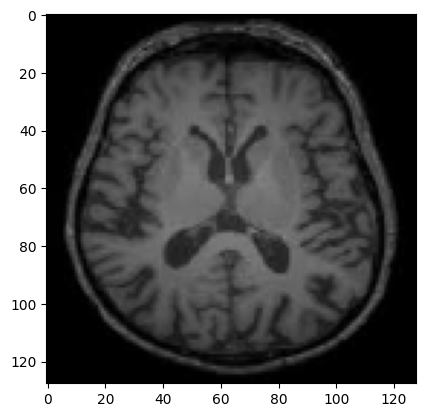

In [16]:
plt.imshow(healthy[0])

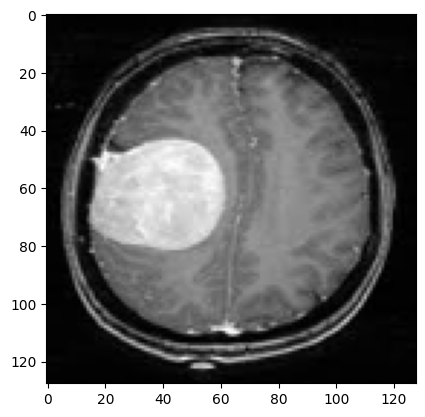

In [17]:
plt.imshow(tumor[0])

In [18]:
def plot_random(healthy, tumor, num=5):
    healthy_images = healthy[np.random.choice(healthy.shape[0],num, replace=False)]
    tumor_images = tumor[np.random.choice(tumor.shape[0],num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        # In matplotlib sublots are not indexed from zero. They are indexed from one. 
        # sublot(Row, Columns in Row, subplot no.)
        plt.subplot(1,num, i + 1)
        plt.title("healthy")
        plt.imshow(healthy_images[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1,num, i + 1)
        plt.title("tumor")
        plt.imshow(tumor_images[i])


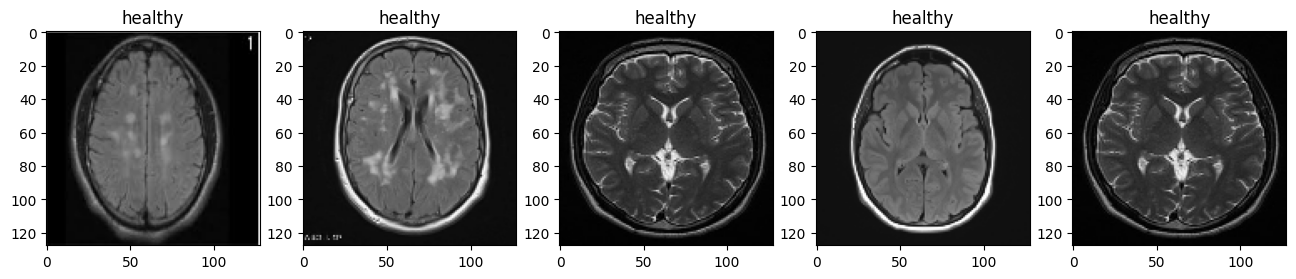

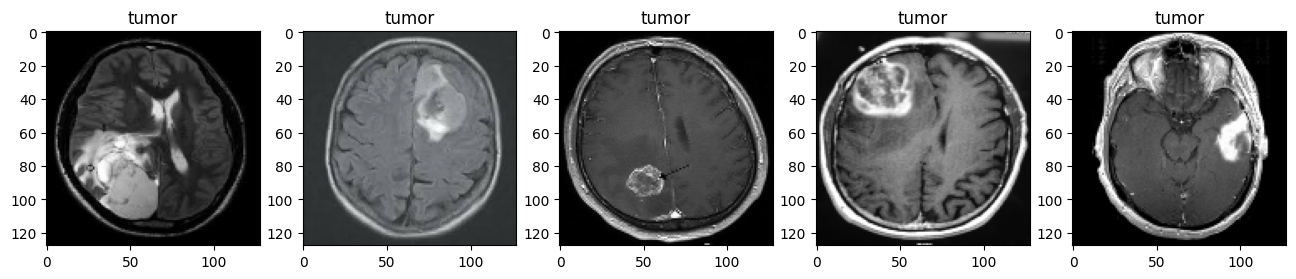

In [19]:
plot_random(healthy,tumor)

### Create Torch Dataset Class
##### What is Pytorch's Abstract Dataset Class

In [20]:
# pytorch has a Dataset class already
class Dataset(object):
    # There is no defined constructor.

    # getitem magical function is used to retrieve a certain datapoint living at a certain index of dataset
    def __getitem__(self, index):
        raise NotImplementedError
    
    # len magical function is used to retrieve a length of a dataset
    def __len__(self):
        raise NotImplementedError
    
    # a = 'st'
    # b = 'zz'
    # a + b = stzz
    # add magical fuction,concatenate the strings and return the result of the concatenation
    def __add__(self, other):
        return ConcatDataset([self, other])

In [21]:
class MRI(Dataset):
    def __init__(self, scores):
        self.x = scores
    
    def __getitem__(self, index):
        return self.x[index]

    def __len__(self):
        return len(self.x)

In [22]:
s = [1,2,3,4,5]
d = MRI(s)

In [23]:
d.x

[1, 2, 3, 4, 5]

In [24]:
d[2]

3

In [25]:
len(d)

5

In [26]:
s1 = [1, 2, 3, 4, 5]
d1 = MRI(s1)

s2 = [6, 7, 8, 9, 10]
d2 = MRI(s2)

d3 = d1 + d2
len(d3)

10

### Creating MRI custom dataset class

In [27]:
class MRIDataset(Dataset):
    def __init__(self):
        healthy = []
        path = "./brain_tumor_dataset/no/*jpg"
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[1], img.shape[0]))
            # print(img.shape)
            healthy.append(img)
        
        tumor = []
        path = "./brain_tumor_dataset/yes/*jpg"
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[1], img.shape[0]))
            # print(img.shape)
            tumor.append(img)
        
        healthy = np.array(healthy, dtype=np.float32)
        # print("Healthy", healthy.shape)
        tumor = np.array(tumor, dtype=np.float32)
        # print("Tumor", tumor.shape)
    
        # LABELS - Tumor with 1's & Halthy with 0's
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        # print(tumor_label)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)
        # print(healthy_label)

        # CONCATENATE
        # Concatenate across first access, it means that 100 of images attach that to 200 of these images
        self.images = np.concatenate((tumor, healthy), axis=0) # (100,512,512,3) + (200,512,512,3) = (300, 512, 512, 3)
        self.labels = np.concatenate((tumor_label, healthy_label)) # We don't need axis = 0 becasue 1s and 0s have 1 dimention. They don't have multiple channels.


    
    def __getitem__(self, index):
        return {'image': self.images[index], 'label': self.labels[index]}

    def __len__(self):
        return self.images.shape[0]

    def normalize(self):
        self.images = self.images/255.0

In [28]:
mri_dataset = MRIDataset()
img = mri_dataset[5]['image']
img.shape

(3, 128, 128)

In [29]:
np.max(img)

255.0

In [30]:
mri_dataset.normalize()

In [31]:
img = mri_dataset[244]['image']
np.max(img)

0.9647059

### Creating a dataloader
#### The world without dataloaders - using for loop

In [32]:
import sys
mri2 = MRIDataset()
mri2.normalize()
indexes = list(range((len(mri2.images))))
random.shuffle(indexes) # shuffle is an in-place operation

# for idx in indexes:
#     img = mri2[idx]['image']
#     img = img.reshape([img.shape[2], img.shape[1], img.shape[0]])
#     plt.title(mri2[idx]['label'])
#     plt.imshow(img)
#     sys.exit()
    # plt.show()

#### The world without dataloaders - using for Next(Iter) commands

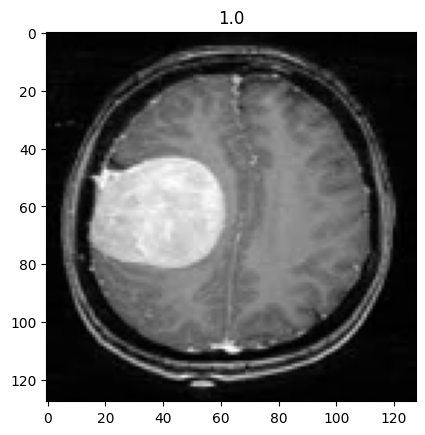

In [33]:
it = iter(mri2)
for idx in range(1):
    img = next(it)['image']
    img = img.reshape([img.shape[2], img.shape[1], img.shape[0]])
    plt.title(mri2[idx]['label'])
    plt.imshow(img)
    plt.show()
    # sys.exit()

### The world with dataloaders

In [34]:
# We need to pass the iterable object
mri3 = MRIDataset()
mri3.normalize()
dataloader = DataLoader(mri3, batch_size=10, shuffle=True) # to create shuffle data, batch_siz=10e: grab 10 images at each iteration.

In [35]:
for sample in dataloader:
    # img = sample['image']
    lable = sample['label']
    
    # print(sample['image'].shape) # torch.Size([1, 3, 128, 128]): 1 image of the [3, 128, 128] dimentions, it means batch_size is 1 in dataloader

    print(sample['image'].shape) # torch.Size([10, 3, 128, 128]): 10 imges of the [3,128,128] dimentions
    # img = sample['image'].squeeze() # to remove the extra dimentionality
    # print(img.shape) # torch.Size([3, 128, 128])

    # img = img.reshape([img.shape[1], img.shape[2], img.shape[0]])
    # plt.title(lable)
    # plt.imshow(img)
    # sys.exit()

torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([5, 3, 128, 128])


### Create a Model

- Convolutional Neural Networks: Convolutional Neural Network is also known as CNN or comp net.. CNN is an artificial neural network that is so far been most popularly used for analyzing images.
- We can think of a CNN as an artificial neural network that has some type of specialization for being able to pick out or detect patterns and make sense of them.
- Pattern detection is what that makes CNN useful for image analysis.

In [36]:
# 
import torch.nn as nn # neural network
import torch.nn.functional as F # this is where the actual functionalities of neural network is stored. 

class CNN(nn.Module): 
    def __init__(self):
        super(CNN, self).__init__() # nn.Module class has already a constuctor in it.. We want to keep all the stuff of constructor. In order to access the parts of parents class, we use the super method. In super method we need to pass the name of our class and self. after that i am saying i want to access to __init__()

        # convotional layers. e.g: conv2d is a layer, that deal with images.
        # self.conv1 = nn.Conv2d()
        # self.conv2 = nn.Conv2d()

        self.cnn_model = nn.Sequential( # Sequential is allowed us to define the sequential objects. Sequential Objects takes all types of layers, whatever type of layer that we want to pass to it.
            
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5)), # to define a CNN, firt thing we need to define, how many number of channels does the input have. Because this the first convolutional layer that we are dealing with, have three channels. out_channels mean how many convolutional filters we wanna have in this particular convolutional layer. Currently, we have choose 6 filters. We can also call them 6 kernals. We have defined the size of each kernal is 5. We can pass it like a tupe(5,5), it means height and width is 5. So, we can only write 5 instead of pasing the tupple.

            # use a comma to add next convolutional layer or whatever.

            nn.Tanh(),  # It's typical convulution in CNN to add different types of non-linearity to our neural network. e.g. it is common to have hyperbolic tangent non-linearity. nn.Tanh() doesn't ask for any type of arguments/parameters becausse it doesn't have any learnable parameter to it. What is it? It is actually a mathematical operation that is going to be implemented in each one of the six channels of data that are going to be passed out.

            nn.AvgPool2d(kernel_size=2, stride=5), # next thing that is common to do after adding non-linearity is actually pulling. We have used an average pulling. What it does? We have define a window of a window size that we want to consider as kernal size. So, that window keep sliding across the input data or whatever input it receive on previous layer and it keeps averaging all of the elements that overlap in that window. In the below visualization kernel_size is 3 by 3. I have considered it 2 by 2. So, i passed 2. What is stride? By default stride is one. What if we wanted to have larger stride, So, higher the stride, the more the data will get crushed. I have took strid=5. So, it just jumps 5x5 and then takes an average and aggregates that window into one scaler value.

            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5), # again it is typical after adding non-linearity and then pulling, again define another convulutional layer. Now, this convolutional layer is going to learn more sophisticated features. If the first convolutional layer is responsible for detecting edges horizontal vertical. This one is going to learn to combine those edges together to recognize shape like circles or rectangles or triangles. So, this is what that the second convolutional layer usually does. Remember that, the data that came out of first convolutional layer had six channels, So the same data is going to travel into second convolutional layer. So, the output of the previous layer is going to be the input of the next layer.s

            nn.Tanh(),

            nn.AvgPool2d(kernel_size=2, stride=5)
        )

        # It is common in CNN to keep the CNN portion and then top of all of those convolutionl layers and pulling layers, we put a classifier. That classifier in neural network tends to be a sequence of fully connected layers
        self.fc_model = nn.Sequential( # fc_model as fully connected model
            
            nn.Linear(in_features=256, out_features=120), # For a linear layer first parameter is in_features. It is going to be 256. So, we from an image that is 128x128, second parameter is out_features, This one in our control. I have considered to be 120. Now this is where we typically go do down, go down, go down.

            nn.Tanh(),

            nn.Linear(in_features=120, out_features=84), # Here in_features is 120 because in the previous linear layer had 120 elements. out_featurs= 84 is an arbitrary value.

            nn.Tanh(),

            nn.Linear(in_features=84, out_features=1),
        )
        # We have two instance variables. One has CNN polling and non-linearities. And the other one has all of our fully connected layers and their non-linearities.

    # We we subclass nn.Module, it has a forward method, which is typical our forward propagation. So, we need to override that. 
    def forward(self,x): # x is image
        x = self.cnn_model(x) 
        x = x.view(x.size(0), -1) # it flattens those 2d arrays.
        x = self.fc_model(x)
        x = F.sigmoid(x) # output of that will be 0 or 1

        return x
    

![Convolutional Neural Network](./1_tSb-EHybFdhvvm_wfjcYeA.gif)

![How-does-a-convolutional-neural-network-recognize-an-occluded-face](./main-qimg-10cba1fabb8c6c1b39d87fa96fe862d9.webp)

![Mathematics in Convolutional Neural Network](./Convolutional%20Neural%20Network.jpg)

### Look into the parameters of the model

In [37]:
model = CNN()

In [38]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [39]:
model.cnn_model

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
)

In [40]:
model.cnn_model[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

In [41]:
model.cnn_model[0].weight # to see kernels or filters

# [[ 0.0791,  0.1122,  0.0600, -0.0502,  0.0238],
#  [ 0.0453,  0.0069, -0.0926,  0.0633, -0.0653],
#  [ 0.0701, -0.0507, -0.0738, -0.0403, -0.0942],
#  [-0.0354, -0.0701,  0.0566,  0.0438,  0.0547],
#  [ 0.0554, -0.0304,  0.0007, -0.1149,  0.0168]],

Parameter containing:
tensor([[[[ 6.8420e-02,  4.3744e-02,  8.2689e-02, -1.0319e-01, -1.1084e-01],
          [ 1.1407e-01,  7.7497e-02, -2.9566e-02,  3.0579e-02, -8.7755e-02],
          [ 1.1459e-01,  5.9845e-02,  5.0415e-02,  1.5936e-02,  7.7866e-02],
          [-9.4899e-02, -2.3373e-02,  9.3676e-02,  4.4469e-02,  1.0681e-01],
          [-7.3989e-02, -4.0208e-02, -7.9911e-02,  8.1454e-02, -8.7067e-02]],

         [[-6.3885e-02,  9.6758e-02,  1.6441e-02,  5.2159e-02, -3.5567e-02],
          [ 7.2349e-02, -2.9939e-02, -6.2537e-02,  7.6482e-02, -8.6402e-02],
          [-1.0323e-01,  1.1365e-02, -6.3073e-02, -6.4413e-02,  5.2225e-02],
          [-7.5749e-02, -1.3204e-02,  1.0447e-01, -4.9658e-02,  6.7692e-02],
          [ 2.9485e-02,  2.4987e-02,  7.0407e-02,  1.5196e-02,  6.3892e-02]],

         [[ 1.7231e-02,  2.0239e-03,  7.4173e-02, -4.9703e-02,  4.4041e-02],
          [-2.0442e-02, -6.9928e-03, -1.1050e-01, -7.0772e-02,  7.2670e-02],
          [-7.4825e-02, -4.4873e-03, -9.3876e-02, 

In [42]:
model.cnn_model[0].weight.shape
# nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5)),
# torch.Size([6, 3, 5, 5]): We have six filters. Each of them is 5x5. Each of them has three channels
# torch.Size([6(filters), 3(channels), 5, 5(5x5)])

torch.Size([6, 3, 5, 5])

In [43]:
model.cnn_model[0].weight[0] # first filter

tensor([[[ 0.0684,  0.0437,  0.0827, -0.1032, -0.1108],
         [ 0.1141,  0.0775, -0.0296,  0.0306, -0.0878],
         [ 0.1146,  0.0598,  0.0504,  0.0159,  0.0779],
         [-0.0949, -0.0234,  0.0937,  0.0445,  0.1068],
         [-0.0740, -0.0402, -0.0799,  0.0815, -0.0871]],

        [[-0.0639,  0.0968,  0.0164,  0.0522, -0.0356],
         [ 0.0723, -0.0299, -0.0625,  0.0765, -0.0864],
         [-0.1032,  0.0114, -0.0631, -0.0644,  0.0522],
         [-0.0757, -0.0132,  0.1045, -0.0497,  0.0677],
         [ 0.0295,  0.0250,  0.0704,  0.0152,  0.0639]],

        [[ 0.0172,  0.0020,  0.0742, -0.0497,  0.0440],
         [-0.0204, -0.0070, -0.1105, -0.0708,  0.0727],
         [-0.0748, -0.0045, -0.0939, -0.0627, -0.0283],
         [ 0.0072,  0.0346,  0.0239,  0.0686,  0.0157],
         [-0.0957, -0.0998,  0.1095,  0.0041, -0.0795]]],
       grad_fn=<SelectBackward0>)

In [44]:
model.cnn_model[0].weight[0].shape # shape of first filter
# torch.Size([3, 5, 5]): 3 channels and each channel has 5x5 tensor

torch.Size([3, 5, 5])

In [45]:
model.cnn_model[0].weight[0][0] # first channel of first filter

tensor([[ 0.0684,  0.0437,  0.0827, -0.1032, -0.1108],
        [ 0.1141,  0.0775, -0.0296,  0.0306, -0.0878],
        [ 0.1146,  0.0598,  0.0504,  0.0159,  0.0779],
        [-0.0949, -0.0234,  0.0937,  0.0445,  0.1068],
        [-0.0740, -0.0402, -0.0799,  0.0815, -0.0871]],
       grad_fn=<SelectBackward0>)

In [46]:
model.cnn_model[0].weight[0][0].shape

torch.Size([5, 5])

#### Look into the Linear layer

In [47]:
model.fc_model

Sequential(
  (0): Linear(in_features=256, out_features=120, bias=True)
  (1): Tanh()
  (2): Linear(in_features=120, out_features=84, bias=True)
  (3): Tanh()
  (4): Linear(in_features=84, out_features=1, bias=True)
)

In [48]:
model.fc_model[0]

Linear(in_features=256, out_features=120, bias=True)

In [49]:
model.fc_model[0].weight

Parameter containing:
tensor([[ 0.0242,  0.0007,  0.0209,  ...,  0.0384, -0.0485,  0.0234],
        [ 0.0239, -0.0572,  0.0450,  ...,  0.0400,  0.0092, -0.0131],
        [ 0.0186,  0.0212,  0.0248,  ..., -0.0599,  0.0141,  0.0364],
        ...,
        [-0.0386,  0.0533, -0.0399,  ...,  0.0364,  0.0484, -0.0112],
        [ 0.0488, -0.0396,  0.0115,  ..., -0.0546, -0.0212, -0.0338],
        [-0.0141, -0.0564, -0.0039,  ..., -0.0158, -0.0355, -0.0550]],
       requires_grad=True)

In [50]:
model.fc_model[0].weight.shape
# torch.Size([120, 256]): 120x256

torch.Size([120, 256])

#### Understanding x.view(x.size(0), -1)

In [51]:
x = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [52]:
x = x.reshape((2,2,2,2))

In [53]:
x

tensor([[[[ 1,  2],
          [ 3,  4]],

         [[ 5,  6],
          [ 7,  8]]],


        [[[ 9, 10],
          [11, 12]],

         [[13, 14],
          [15, 16]]]])

In [54]:
# x.view(x.size(0), -1): let's understand, what does this x.size(0) returns.
x.size()
# torch.Size([2, 2, 2, 2]): returns the shape of x

torch.Size([2, 2, 2, 2])

In [55]:
x.size(0) # 0 grab the first dimention of input data.
# 128, 128, 3, ?
# Why does input data have four dimentions? What is this fourth dimention is about?
# fourth dimention  has nothing to do with the image itself, but it has something to do with the fact that when we train our neural network. We dont just pass images one by one to our neural network. We send them in batches or mini batches. So, if we have 32 images in one batch and we send those images into our model.
# (32) first element is how many images we have in that batch That is known as data points
# (32, 3) then we have number of channels
# (32, 3, 128, 128) then we have hight and width

2

In [56]:
x.view(-1) # it flattens our n dimentional, We want to flat each input data independent of the other input data

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [57]:
x.view(x.size(0), -1) # x.size(0) says look x.view() in this x we have x.size(0) number of data points. I wanted to flat each one of them independently.

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16]])

In [58]:
x.view(x.size(0), -1).shape
# torch.Size([2, 8]): This has two data points and each of  them has 8 elements why? because each of them is 2x2x2. When we flatten that, we end up with 8 flattened elements.

torch.Size([2, 8])

## Some Basics of Training and Evaluation in Pytorch
### model.eval()

## Evaluate a New-Born Neural Network

In [59]:
mri_dataset_for_new_born_neural_network = MRIDataset()
mri_dataset_for_new_born_neural_network.normalize()
model = CNN()

In [60]:
dataloader_for_new_born_neural_network = DataLoader(mri_dataset_for_new_born_neural_network, batch_size=32, shuffle=False)

In [61]:
model.eval()
outputs = []
y_true = []

with torch.no_grad():
    for D in dataloader_for_new_born_neural_network:
        image = D['image']
        label = D['label']

        y_hat = model(image)
        outputs.append(y_hat.numpy())
        y_true.append(label.numpy())

In [62]:
outputs = np.concatenate(outputs, axis=0).squeeze()
y_true = np.concatenate(y_true, axis=0).squeeze()

In [63]:
outputs[:5]

array([0.47179943, 0.47331014, 0.4778641 , 0.4775035 , 0.4752062 ],
      dtype=float32)

In [64]:
y_true[0:4]

array([1., 1., 1., 1.], dtype=float32)

In [65]:
def threshold(scores, threshold=0.50, minimum=0, maximum=1.0):
    x = np.array(list(scores))
    x[x >= threshold] = maximum
    x[x < threshold] = minimum
    return x

In [66]:
accuracy_score(y_true, threshold(outputs))

0.37142857142857144

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

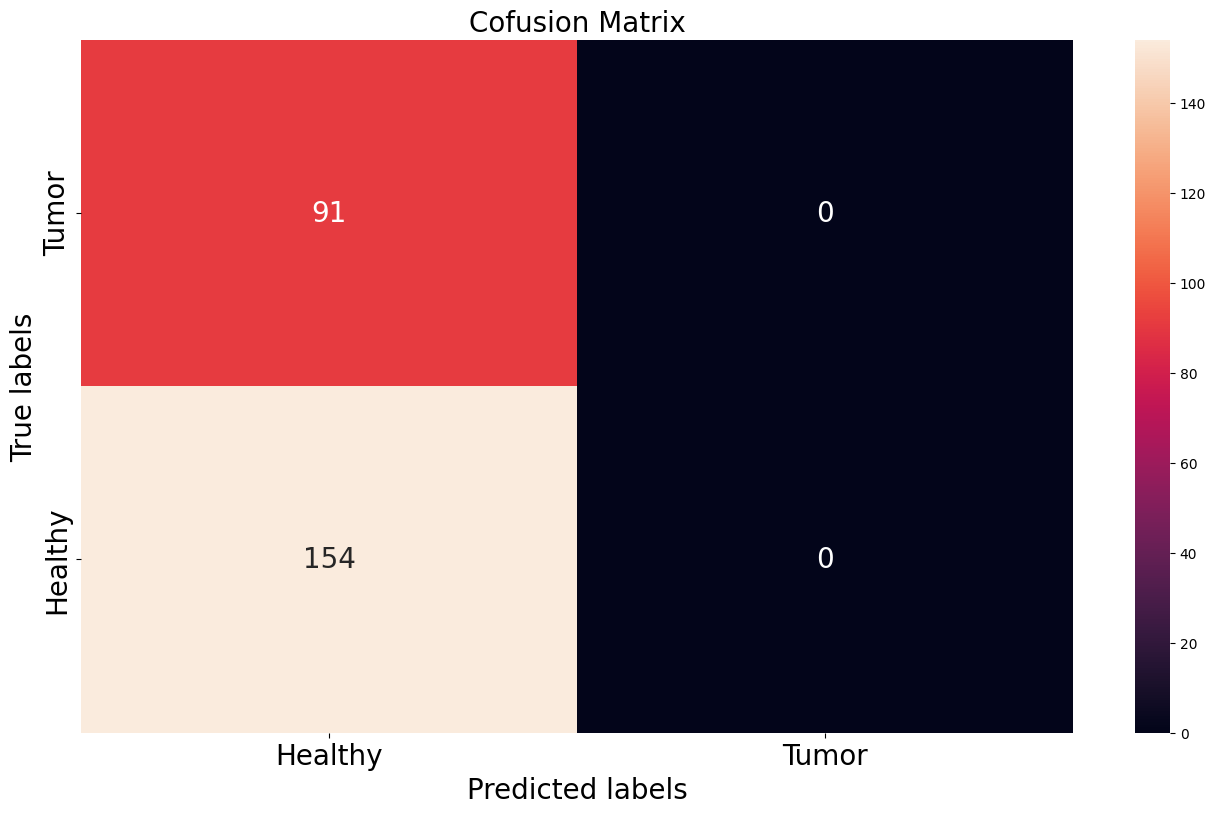

In [67]:
# a better confusion matrix
import seaborn as sns
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size":20})

# labels, titles and ticks
ax.set_xlabel("Predicted labels", fontsize=20)
ax.set_ylabel("True labels", fontsize=20)
ax.set_title("Cofusion Matrix", fontsize=20)
ax.xaxis.set_ticklabels(['Healthy', 'Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor', 'Healthy'], fontsize=20)

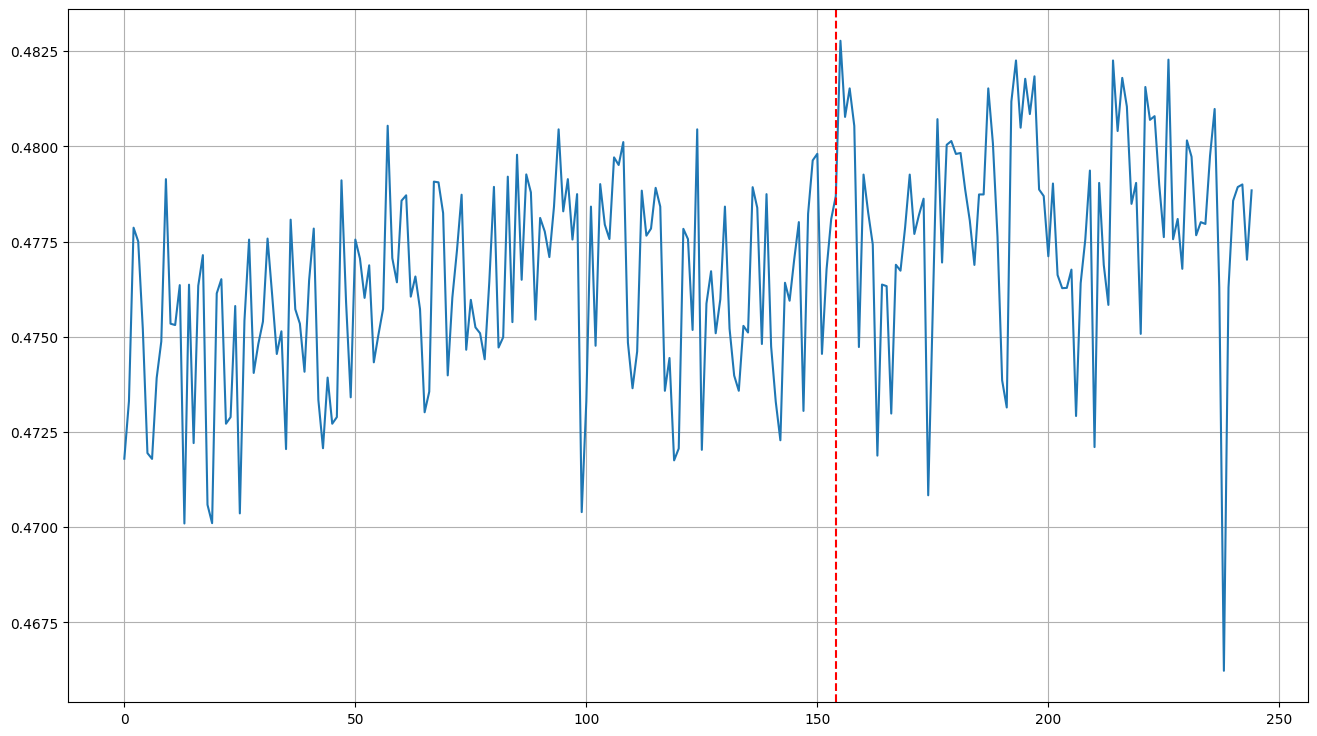

In [68]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

### Train the dumb model

In [69]:
mri_dataset_to_train_the_neural_network = MRIDataset()
mri_dataset_to_train_the_neural_network.normalize()

In [70]:
eta = 0.0001
EPOCH = 400
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
dataloader_to_train_the_neural_network = DataLoader(mri_dataset_to_train_the_neural_network, batch_size=32, shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [71]:
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader_to_train_the_neural_network:
        optimizer.zero_grad()
        data = D['image']
        label = D['label']
        y_hat = model(data)
        # print(y_hat.squeeze().shape)
        # print(label.shape)
        # sys.exit()
        
        #define loss function
        error = nn.BCELoss()
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tloss: {:.6f}'.format(epoch+1, np.mean(losses)))
    

Train Epoch: 10	loss: 0.626520
Train Epoch: 20	loss: 0.588680
Train Epoch: 30	loss: 0.549139
Train Epoch: 40	loss: 0.531879
Train Epoch: 50	loss: 0.525700
Train Epoch: 60	loss: 0.518853
Train Epoch: 70	loss: 0.500089
Train Epoch: 80	loss: 0.480230
Train Epoch: 90	loss: 0.482123
Train Epoch: 100	loss: 0.449503
Train Epoch: 110	loss: 0.433586
Train Epoch: 120	loss: 0.430882
Train Epoch: 130	loss: 0.419326
Train Epoch: 140	loss: 0.392491
Train Epoch: 150	loss: 0.376608
Train Epoch: 160	loss: 0.370717
Train Epoch: 170	loss: 0.349050
Train Epoch: 180	loss: 0.327040
Train Epoch: 190	loss: 0.326531
Train Epoch: 200	loss: 0.294650
Train Epoch: 210	loss: 0.285057
Train Epoch: 220	loss: 0.268447
Train Epoch: 230	loss: 0.244771
Train Epoch: 240	loss: 0.218464
Train Epoch: 250	loss: 0.198272
Train Epoch: 260	loss: 0.175925
Train Epoch: 270	loss: 0.153987
Train Epoch: 280	loss: 0.135420
Train Epoch: 290	loss: 0.107623
Train Epoch: 300	loss: 0.096098
Train Epoch: 310	loss: 0.096929
Train Epoch: 320	

## Evaluate a smart model

In [86]:
model.eval()
dataloader_to_train_the_neural_network = DataLoader(mri_dataset_to_train_the_neural_network, batch_size=32, shuffle=False)
outputs = []
y_true = []

with torch.no_grad():
    for D in dataloader_to_train_the_neural_network:
        image = D['image']
        label = D['label']

        y_hat = model(image)
        outputs.append(y_hat.numpy())
        y_true.append(label.numpy())
    

In [87]:
# Convert list of numpy arrays to a single numpy array
outputs = np.concatenate(outputs, axis=0)
y_true = np.concatenate(y_true, axis=0)

# Apply threshold function (assuming it is a separate function)
thresholded_outputs = threshold(outputs)

# Calculate accuracy
accuracy = accuracy_score(y_true, thresholded_outputs)
print(f'Accuracy: {accuracy}')
# accuracy_score(y_true, threshold(outputs))

Accuracy: 1.0


[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

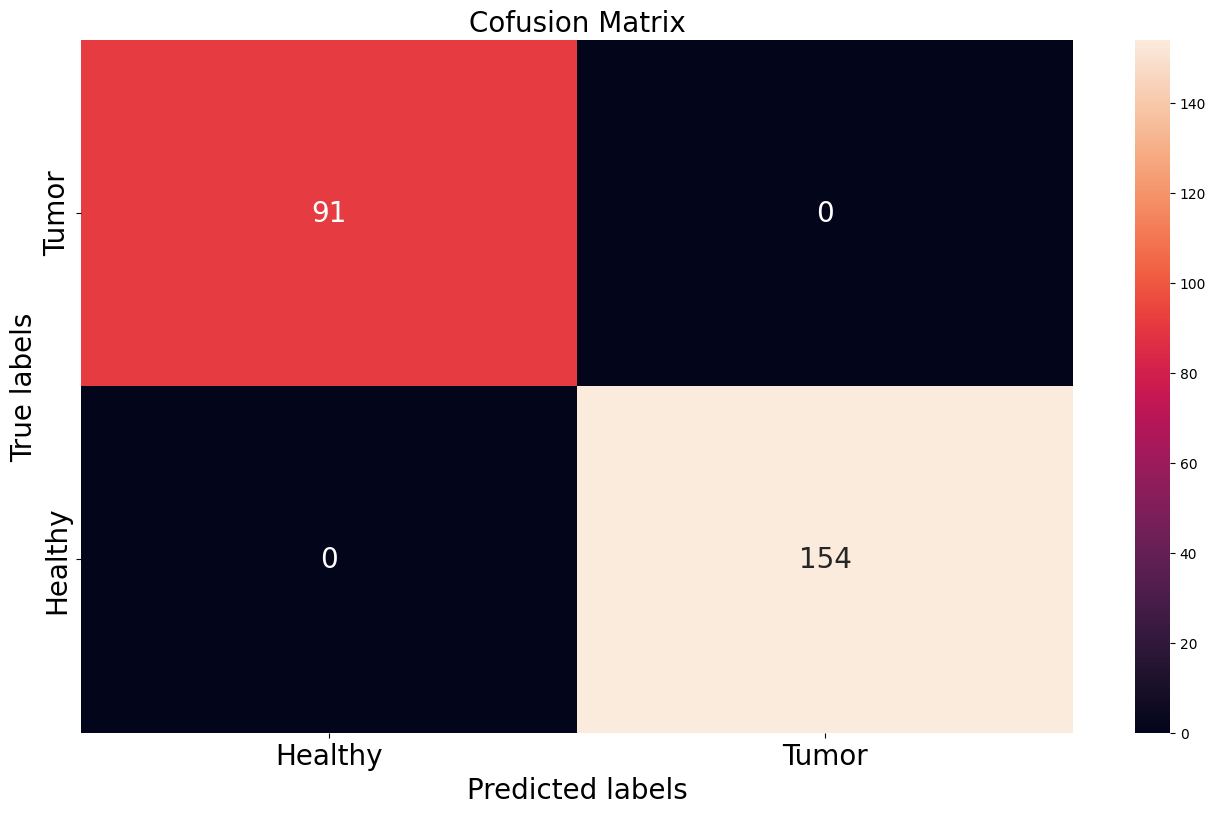

In [88]:
# a better confusion matrix
import seaborn as sns
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size":20})

# labels, titles and ticks
ax.set_xlabel("Predicted labels", fontsize=20)
ax.set_ylabel("True labels", fontsize=20)
ax.set_title("Cofusion Matrix", fontsize=20)
ax.xaxis.set_ticklabels(['Healthy', 'Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor', 'Healthy'], fontsize=20)

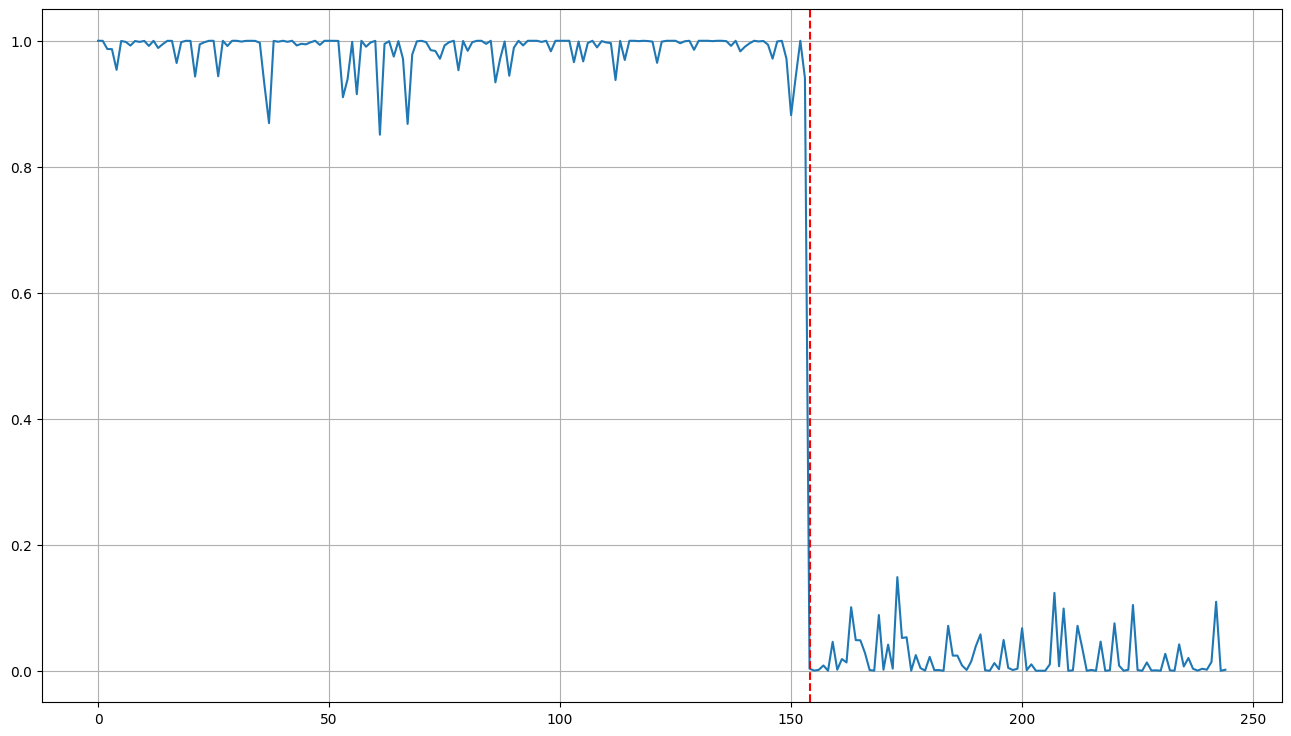

In [89]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()